# Project Part III: Identification of 4 Unknown Subjects Using Trained Kohonen SOM

### Author: Hafiz Chaudhry Rafay Aamir

### Date: 23 Mai 2025

#

## Identity of 4 subjects

- Subject 1 classified as: Patient
- Subject 2 classified as: Patient
- Subject 3 classified as: Patient
- Subject 4 classified as: Patient

## -----------------------------------------------------------

# Explanation of Differences: Kohonen SOM vs K-Means vs K-Nearest Neighbors (KNN)

#

## Kohonen SOM:

**Nature**: Unsupervised Neural Network.

**Goal**Dimensionality reduction, visualization, and clustering by mapping high-dimensional data onto a low-dimensional (e.g., 2D) grid of neurons. It preserves topological relationships.

**Learning**Competitive learning with a neighborhood function. The "winner" neuron and its neighbors adapt their weights towards the input, with the influence decreasing for more
distant neighbors.

**Output**A topological map where similar inputs activate nearby neurons. The neuron weights become prototypes.

**Key Feature**Topology-preserving map, allowing for visualization of data relationships.
#

## -----------------------------------------------------------
## K-Means:

**Nature:** Unsupervised Algorithm.

**Goal:** Partitions data into a predefined number (k) of distinct, non-overlapping clusters based on proximity to cluster centroids.

**Learning:** Iterative optimization. Data points are assigned to the nearest centroid, then centroids are updated as the mean of their assigned points, repeated until convergence.

**Output:** k clusters and their centroids; each data point belongs to one cluster.

**Key Feature:** Simplicity and efficiency for partitioning data into spherical clusters. No inherent topology preservation.
#

## -----------------------------------------------------------
## K-Nearest Neighbors (KNN):

**Nature:** SUPERVISED Algorithm.

**Goal:** To classify or regress new, unlabeled data points based on the majority class (or average value) of their k nearest, labeled neighbors in a training dataset.

**Learning:** "Lazy learning." No explicit training phase; it simply stores the entire labeled training dataset.

**Output:** A predicted class label (or numerical value) for a single new input query.

**Key Feature:** Instance-based, non-parametric, requires labeled training data. It does not perform unsupervised clustering or pattern discovery.
#

## -----------------------------------------------------------
## Simple Unsupervised Spiking Neural Network (SNN):

**Nature:** Biologically plausible Unsupervised Neural Network.

**Goal:** To learn patterns, features, or clusters in spatiotemporal (spike-based) data, often mimicking brain processes.

**Learning:** Typically uses Spike-Timing-Dependent Plasticity (STDP), a biologically inspired rule where synaptic weights are adjusted based on the precise relative timing of pre- and post-synaptic spikes. Often combines with competitive learning (lateral inhibition).

**Output:** Learned synaptic weights that represent patterns in the input spike trains, and neurons that become selective "feature detectors" or cluster prototypes based on their firing patterns.

**Key Feature:** Temporal processing and biological realism (spikes, membrane potentials, STDP), learning from spike timings rather than continuous values.

# -----------------------------------------------------------

# Visual Perception project with Prof Dr E Thomas Part 1
Hello

This is part I of a 3 part project. The ultimate aim will be to automatically detect patients and healthy subjects (controls) using data from markers placed on the subjects. For classification you will use a self organizing map (SOM). In part 1 you will construct the SOM. In part II, you will train the network using data which I will send you. In part III, each person will receive a test set for identification. 

 

1) Construct a Kohonen network in order to carry out the classification of the vectors

 

(1 1 0 0)

(1 0 0 0)

(0 0 0 1)

(0 0 1 1)

 

Construct a network that is flexible in terms of the size of the input vector.  This will permit you to easily utilize the patient and healthy subject data.

 

Pay attention to the adjustment in the learning rate.  You may have to find the value that allows a convergence (i.e. synaptic weights that converge).

 

The vectors (1 1 0 0) and (1 0 0 0) should fall in one class I while the remaining two vectors should fall in class II. 

 

2) Once the training is completed carry out a test with the vectors

 

(0, 0, 0, 0.9)

(0, 0, 0.8, 0.9)

(0.7, 0, 0, 0)

(0.7, 0.9, 0, 0)

 

As you might expect, the vectors (0, 0, 0, 0.9) and (0, 0, 0.8, 0.9) should fall in class II while the vectors (0.7, 0, 0, 0) and (0.7, 0.9, 0, 0) should fall in class I.


Sincerely

Elizabeth Thomas
Associate Professor
Université de Bourgogne

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Re-defining the KohonenSOM class here for completeness and self-containment
class KohonenSOM:
    def __init__(self, input_dim, num_neurons, learning_rate=0.5, num_iterations=100):
        """
        input_dim: Dimension of input vectors.
        num_neurons: Number of neurons in the SOM (here, 2 for two classes).
        learning_rate: Initial learning rate.
        num_iterations: Total number of iterations over the training set.
        """
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        # Initialize weights randomly between 0 and 1
        self.weights = np.random.rand(num_neurons, input_dim)
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        # List to store the average quantization error for each epoch
        self.quantization_errors_ = []
        
    def _decay_learning_rate(self, iter_idx):
        """
        Decays the learning rate over iterations.
        iter_idx: Current iteration index.
        """
        # A simple linear decay function for the learning rate
        # Ensures learning rate decreases from initial_lr to 0 over num_iterations
        return self.learning_rate * (1.0 - iter_idx / self.num_iterations)
    
    def _find_winner(self, input_vec):
        """
        Finds the Best Matching Unit (BMU) for a given input vector.
        input_vec: The input vector.
        Returns the index of the winning neuron.
        """
        # Compute Euclidean distances from the input to each neuron's weight vector
        distances = np.linalg.norm(self.weights - input_vec, axis=1)
        # Return the index of the winning neuron (minimum distance)
        return np.argmin(distances)
    
    def train(self, training_data):
        """
        Train the SOM using the training_data.
        training_data: numpy array of shape (n_samples, input_dim)
        """
        num_samples = training_data.shape[0]
        
        for iteration in range(self.num_iterations):
            # Decay the learning rate over iterations
            current_lr = self._decay_learning_rate(iteration)
            
            # Initialize quantization error for the current epoch
            epoch_quantization_error = 0.0
            
            # Shuffle the training data for each epoch to ensure random presentation
            # This helps prevent the SOM from getting stuck in local minima
            shuffled_indices = np.arange(num_samples)
            np.random.shuffle(shuffled_indices)
            
            for idx in shuffled_indices:
                sample = training_data[idx]
                winner = self._find_winner(sample)
                
                # Calculate quantization error for the current sample
                # This is the Euclidean distance between the sample and its winning neuron's weight vector
                sample_quantization_error = np.linalg.norm(sample - self.weights[winner])
                epoch_quantization_error += sample_quantization_error
                
                # Update the winning neuron's weights
                # The weights move closer to the input sample, adjusted by the current learning rate
                self.weights[winner] += current_lr * (sample - self.weights[winner])
            
            # Store the average quantization error for the current epoch
            # Divide by num_samples to get the average error per sample for the epoch
            self.quantization_errors_.append(epoch_quantization_error / num_samples)
            
            # Print progress to observe convergence
            if (iteration + 1) % 10 == 0 or iteration == self.num_iterations - 1:
                print(f"Epoch {iteration + 1}/{self.num_iterations}, Learning Rate: {current_lr:.4f}, Avg Quantization Error: {self.quantization_errors_[-1]:.4f}")
                
    def label_neurons(self, training_data, training_labels):
        """
        After training, label each neuron by majority vote.
        training_data: numpy array of shape (n_samples, input_dim)
        training_labels: list or numpy array of class labels corresponding to training_data.
        Returns a dictionary mapping neuron index to the assigned label.
        """
        # Create a dictionary to store labels associated with each neuron
        neuron_labels = {i: [] for i in range(self.num_neurons)}
        for sample, label in zip(training_data, training_labels):
            winner = self._find_winner(sample)
            neuron_labels[winner].append(label)
        
        # Assign each neuron the majority label based on the samples it "won"
        neuron_majority = {}
        for neuron, labels in neuron_labels.items():
            if labels:
                # Count occurrences of each label
                counts = {}
                for lab in labels:
                    counts[lab] = counts.get(lab, 0) + 1
                # Find the label with the maximum count (majority vote)
                majority_label = max(counts, key=counts.get)
                neuron_majority[neuron] = majority_label
            else:
                # If no training samples activated this neuron, it remains unassigned
                neuron_majority[neuron] = None
        return neuron_majority
    
    def classify(self, input_vec):
        """
        Classify a new input vector by finding its winning neuron.
        Returns the index of the winning neuron.
        """
        return self._find_winner(input_vec)
    
    def batch_classify(self, test_data):
        """
        Classify a set of input vectors.
        Returns a list of winning neuron indices for each input vector.
        """
        return [self._find_winner(vec) for vec in test_data]
    
    def plot_quantization_error(self, title: str = "Quantization Error Over Epochs") -> None:
        """
        Plots the average quantization error recorded during training.
        """
        if not self.quantization_errors_:
            print("No quantization error data to plot. Train the SOM first.")
            return
        
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.quantization_errors_) + 1), self.quantization_errors_, marker='o', linestyle='-')
        plt.xlabel("Epoch")
        plt.ylabel("Average Quantization Error")
        plt.title(title)
        plt.grid(True)
        plt.show()
    
    def print_weights(self):
        print("Neuron weights:")
        for i, w in enumerate(self.weights):
            print(f"Neuron {i}: {w}")

Epoch 10/100, Learning Rate: 0.4550, Avg Quantization Error: 0.5889
Epoch 20/100, Learning Rate: 0.4050, Avg Quantization Error: 0.5989
Epoch 30/100, Learning Rate: 0.3550, Avg Quantization Error: 0.5768
Epoch 40/100, Learning Rate: 0.3050, Avg Quantization Error: 0.5786
Epoch 50/100, Learning Rate: 0.2550, Avg Quantization Error: 0.5608
Epoch 60/100, Learning Rate: 0.2050, Avg Quantization Error: 0.5511
Epoch 70/100, Learning Rate: 0.1550, Avg Quantization Error: 0.5394
Epoch 80/100, Learning Rate: 0.1050, Avg Quantization Error: 0.5263
Epoch 90/100, Learning Rate: 0.0550, Avg Quantization Error: 0.5137
Epoch 100/100, Learning Rate: 0.0050, Avg Quantization Error: 0.5012


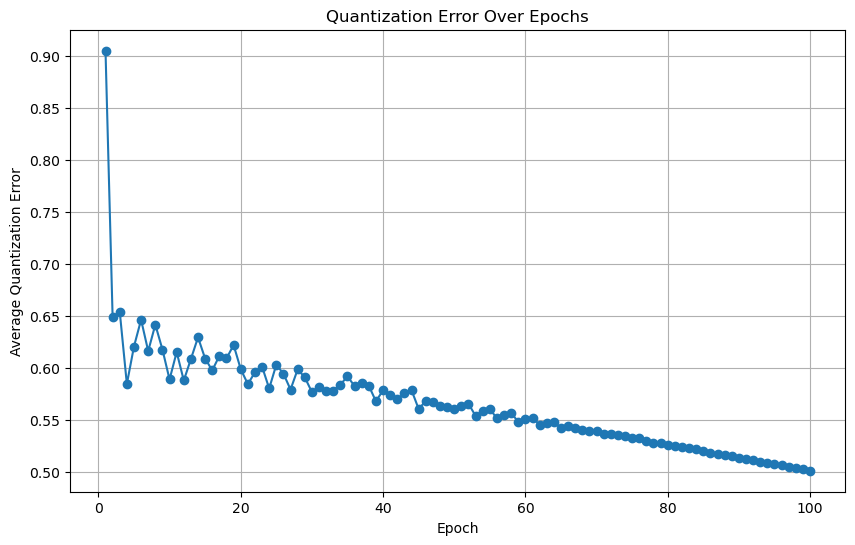

Neuron labels after training: {0: 'I', 1: 'II'}


In [4]:
# -----------------------------
# Define training data and labels

# Training vectors:
# Class I: (1,1,0,0) and (1,0,0,0)
# Class II: (0,0,0,1) and (0,0,1,1)
train_vectors = np.array([[1, 1, 0, 0],
                          [1, 0, 0, 0],
                          [0, 0, 0, 1],
                          [0, 0, 1, 1]], dtype=float)
# The labels we want to assign eventually (unsupervised training, but used for labeling neurons)
train_labels = ['I', 'I', 'II', 'II']

# -----------------------------
# Create and train the SOM
input_dim = train_vectors.shape[1]
num_neurons = 2  # one neuron per class
som = KohonenSOM(input_dim=input_dim, num_neurons=num_neurons, learning_rate=0.5, num_iterations=100)

som.train(train_vectors)
som.plot_quantization_error()
# Label neurons by majority vote from training data
neuron_labels = som.label_neurons(train_vectors, train_labels)
print("Neuron labels after training:", neuron_labels)

In [5]:
# -----------------------------
# Define test data
test_vectors = np.array([[0,   0,   0,   0.9],
                         [0,   0,   0.8, 0.9],
                         [0.7, 0,   0,   0],
                         [0.7, 0.9, 0,   0],
                         [0, 0.9, 0.7,   0],
                         [0, 0.7, 0.9,   0]], dtype=float)

# Classify test data using the trained SOM
winner_indices = som.batch_classify(test_vectors)
print("\nTest vectors classification (neuron index):", winner_indices)

# Map the winning neuron index to the class label based on the majority vote
test_classification = [neuron_labels[winner] for winner in winner_indices]
print("Test vectors classified as:", test_classification)

# Expected output:
# The first two test vectors (with higher values in the last coordinates) should be classified as class II,
# while the last two (with higher values in the first coordinates) should be classified as class I.


Test vectors classification (neuron index): [1, 1, 0, 0, 0, 1]
Test vectors classified as: ['II', 'II', 'I', 'I', 'I', 'II']


In [6]:
# Input training vectors and expected classes
train_vectors = np.array(
    [
        [1, 1, 0, 0],  # Class 0 (I)
        [1, 0, 0, 0],  # Class 0 (I)
        [0, 0, 0, 1],  # Class 1 (II)
        [0, 0, 1, 1],  # Class 1 (II)
    ]
)

# Initialize SOM
som.train(train_vectors)
som.print_weights()

# Test vectors
test_vectors = np.array(
    [
        [0, 0, 0, 0.9],  # Expect class II (1)
        [0, 0, 0.8, 0.9],  # Expect class II (1)
        [0.7, 0, 0, 0],  # Expect class I (0)
        [0.7, 0.9, 0, 0],  # Expect class I (0)
    ]
)

print("\nTest results:")
for vec in test_vectors:
    cls = som.classify(vec)
    print(f"Vector {vec} classified as class {cls}")

Epoch 10/100, Learning Rate: 0.4550, Avg Quantization Error: 0.6428
Epoch 20/100, Learning Rate: 0.4050, Avg Quantization Error: 0.6182
Epoch 30/100, Learning Rate: 0.3550, Avg Quantization Error: 0.5979
Epoch 40/100, Learning Rate: 0.3050, Avg Quantization Error: 0.5775
Epoch 50/100, Learning Rate: 0.2550, Avg Quantization Error: 0.5619
Epoch 60/100, Learning Rate: 0.2050, Avg Quantization Error: 0.5505
Epoch 70/100, Learning Rate: 0.1550, Avg Quantization Error: 0.5385
Epoch 80/100, Learning Rate: 0.1050, Avg Quantization Error: 0.5262
Epoch 90/100, Learning Rate: 0.0550, Avg Quantization Error: 0.5138
Epoch 100/100, Learning Rate: 0.0050, Avg Quantization Error: 0.5013
Neuron weights:
Neuron 0: [1.00000000e+00 5.01565440e-01 5.24887023e-55 7.86781825e-55]
Neuron 1: [9.35084092e-55 3.58852374e-55 5.01046028e-01 1.00000000e+00]

Test results:
Vector [0.  0.  0.  0.9] classified as class 1
Vector [0.  0.  0.8 0.9] classified as class 1
Vector [0.7 0.  0.  0. ] classified as class 0
Vec

Please write your own code for this project. It should of course be well commented so that I can follow your steps.

 

# Class project for the module Human Psychophysics Part II



Elizabeth Thomas
Université de Bourgogne
INSERMU1093



1)    Train your Kohonen networks using the training data set that I am sending.  As to be expected, the ‘healthy.txt’ file contains data from healthy subjects (also called controls) and the ‘patient.txt’ contains patient data.  Each line corresponds to the data (time series) coming from one subject.  The time series is made up of the displacements of markers placed on the joints of subjects. There are ten subjects in each file.  Of course, the same markers are used for all subjects. You do not have to adjust anything in each time series as the information from each marker has already been put in the correct position in the time series.

 

2)  Of course, the dimensions of your input and weight vectors for the Kohonen network then have to be adjusted for the length of each time series.

 

3)  In a few days, you will each receive an individual test dataset.



Sincerely

Elizabeth Thomas

Associate Professor

Université de Bourgogne

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Optional


def load_and_validate_data(
    control_filepath: str, patient_filepath: str
) -> Tuple[Optional[np.ndarray], Optional[np.ndarray], int]:
    """
    Loads control and patient data from specified files, validates them,
    and determines the input dimension.

    Args:
        control_filepath (str): Path to the control data file.
        patient_filepath (str): Path to the patient data file.

    Returns:
        Tuple[Optional[np.ndarray], Optional[np.ndarray], int]:
            A tuple containing (control_data, patient_data, input_dimension).
            Returns (None, None, 0) if loading or validation fails.
    """
    control_data_arr: Optional[np.ndarray] = None
    patient_data_arr: Optional[np.ndarray] = None
    input_dim: int = 0

    if not os.path.exists(control_filepath):
        print(f"Error: File not found - {control_filepath}")
        return None, None, 0
    if not os.path.exists(patient_filepath):
        print(f"Error: File not found - {patient_filepath}")
        return None, None, 0

    try:
        control_data_arr = np.loadtxt(control_filepath)
        if control_data_arr.size == 0:
            print(f"Error: Control data file '{control_filepath}' is empty.")
            return None, None, 0
        if control_data_arr.ndim == 1:
            control_data_arr = control_data_arr.reshape(1, -1)
        print(f"Loaded control data shape: {control_data_arr.shape}")

        patient_data_arr = np.loadtxt(patient_filepath)
        if patient_data_arr.size == 0:
            print(f"Error: Patient data file '{patient_filepath}' is empty.")
            return None, None, 0
        if patient_data_arr.ndim == 1:
            patient_data_arr = patient_data_arr.reshape(1, -1)
        print(f"Loaded patient data shape: {patient_data_arr.shape}")

        if control_data_arr.shape[1] != patient_data_arr.shape[1]:
            print("Error: Control and patient data have different feature dimensions!")
            print(f"  Control features: {control_data_arr.shape[1]}")
            print(f"  Patient features: {patient_data_arr.shape[1]}")
            return None, None, 0

        input_dim = control_data_arr.shape[1]
        print(f"Determined Input Dimension: {input_dim}")
        return control_data_arr, patient_data_arr, input_dim

    except ValueError as ve:
        print(f"An error occurred loading data (likely non-numeric data in file): {ve}")
        return None, None, 0
    except Exception as e:
        print(f"An unexpected error occurred loading the data: {e}")
        return None, None, 0


def plot_group_mean_comparison(
    control_data_arr: np.ndarray,
    patient_data_arr: np.ndarray,
    input_dimension: int,
    plot_individual_traces: bool = False,
    use_sem: bool = False,
    control_color: str = "#1f77b4",  # Matplotlib's default blue
    patient_color: str = "#ff7f0e",  # Matplotlib's default orange
    line_alpha: float = 0.15,
    line_width_individual: float = 0.8,
) -> None:
    """
    Visualizes and compares control and patient group data by plotting their
    mean time series with shaded areas for variability (Std Dev or SEM).

    Args:
        control_data_arr (np.ndarray): Array of control subject data.
        patient_data_arr (np.ndarray): Array of patient subject data.
        input_dimension (int): The number of features/time points.
        plot_individual_traces (bool): If True, plots individual subject traces lightly.
        use_sem (bool): If True, uses Standard Error of Mean for variability; otherwise, uses Standard Deviation.
        control_color (str): Color for the control group plots.
        patient_color (str): Color for the patient group plots.
        line_alpha (float): Alpha for individual traces.
        line_width_individual (float): Line width for individual traces.
    """
    time_axis = np.arange(input_dimension)
    variance_metric_label = "SEM" if use_sem else "Std Dev"

    plt.figure(figsize=(13, 7))  # Adjusted figure size for a single plot

    # --- Control Group ---
    if control_data_arr.shape[0] > 0:
        mean_control = np.mean(control_data_arr, axis=0)
        if use_sem:
            # SEM = std / sqrt(N)
            bound_control = np.std(control_data_arr, axis=0) / np.sqrt(
                control_data_arr.shape[0]
            )
        else:
            # Standard Deviation
            bound_control = np.std(control_data_arr, axis=0)

        if plot_individual_traces:
            for i in range(control_data_arr.shape[0]):
                plt.plot(
                    time_axis,
                    control_data_arr[i, :],
                    color=control_color,
                    alpha=line_alpha,
                    linewidth=line_width_individual,
                    zorder=1,
                )

        plt.plot(
            time_axis,
            mean_control,
            color=control_color,
            linestyle="-",
            linewidth=2.5,
            label=f"Control Mean (N={control_data_arr.shape[0]})",
            zorder=2,
        )
        plt.fill_between(
            time_axis,
            mean_control - bound_control,
            mean_control + bound_control,
            color=control_color,
            alpha=0.25,
            label=f"Control ±1 {variance_metric_label}",
            zorder=1,
        )
    else:
        print("No data to plot for the control group.")

    # --- Patient Group ---
    if patient_data_arr.shape[0] > 0:
        mean_patient = np.mean(patient_data_arr, axis=0)
        if use_sem:
            bound_patient = np.std(patient_data_arr, axis=0) / np.sqrt(
                patient_data_arr.shape[0]
            )
        else:
            bound_patient = np.std(patient_data_arr, axis=0)

        if plot_individual_traces:
            for i in range(patient_data_arr.shape[0]):
                plt.plot(
                    time_axis,
                    patient_data_arr[i, :],
                    color=patient_color,
                    alpha=line_alpha,
                    linewidth=line_width_individual,
                    zorder=1,
                )

        plt.plot(
            time_axis,
            mean_patient,
            color=patient_color,
            linestyle="--",
            linewidth=2.5,
            label=f"Patient Mean (N={patient_data_arr.shape[0]})",
            zorder=2,
        )
        plt.fill_between(
            time_axis,
            mean_patient - bound_patient,
            mean_patient + bound_patient,
            color=patient_color,
            alpha=0.25,
            label=f"Patient ±1 {variance_metric_label}",
            zorder=1,
        )
    else:
        print("No data to plot for the patient group.")

    plt.title(f"Group Comparison: Mean Time Series (±1 {variance_metric_label})")
    plt.xlabel("Time Point (Feature Index)")
    plt.ylabel("Marker Displacement Value")

    # Improve legend handling
    # Collect handles and labels to avoid duplicate labels from fill_between and plot for the variability metric
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels_dict = {}
    for handle, label in zip(handles, labels):
        if (
            label not in unique_labels_dict
        ):  # or "Mean" in label: # Keep mean labels separate
            unique_labels_dict[label] = handle

    if unique_labels_dict:  # only show legend if there's something to plot
        plt.legend(unique_labels_dict.values(), unique_labels_dict.keys(), loc="best")

    plt.grid(True, linestyle=":", alpha=0.6)

    # Aesthetics: remove top and right spines for a cleaner look
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

Loaded control data shape: (10, 650)
Loaded patient data shape: (10, 650)
Determined Input Dimension: 650
Data loaded successfully. Proceeding to visualization.


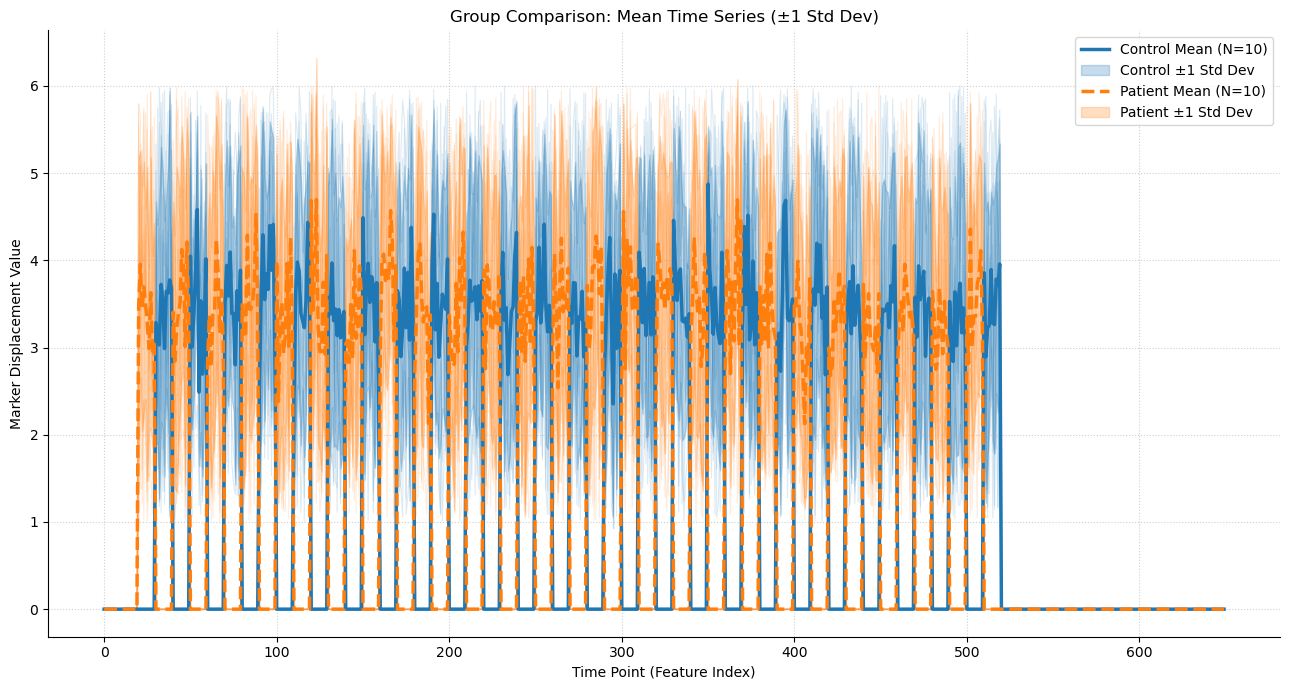

In [8]:
control_file = "control.txt"
patient_file = "patient.txt"

if os.path.exists(control_file) and os.path.exists(patient_file):
    control_data, patient_data, input_dim_real = load_and_validate_data(
        control_file, patient_file
    )

    if control_data is not None and patient_data is not None and input_dim_real > 0:
        print("Data loaded successfully. Proceeding to visualization.")
        plot_group_mean_comparison(
            control_data,
            patient_data,
            input_dim_real,
            plot_individual_traces=True,  # Set to True to see individual lines
            use_sem=False,  # Set to True to use Standard Error of Mean
        )
    else:
        print("Data loading or validation failed. Skipping visualization.")

else:
    print(f"No such file exist: {control_file}")
    print(f"No such file exist: {patient_file}")

Detected input dimension (length of time series): 650

--- Starting SOM Training with Loaded Data ---
Epoch 10/500, Learning Rate: 0.4910, Avg Quantization Error: 25.3413
Epoch 20/500, Learning Rate: 0.4810, Avg Quantization Error: 25.7080
Epoch 30/500, Learning Rate: 0.4710, Avg Quantization Error: 25.3775
Epoch 40/500, Learning Rate: 0.4610, Avg Quantization Error: 25.3592
Epoch 50/500, Learning Rate: 0.4510, Avg Quantization Error: 25.5037
Epoch 60/500, Learning Rate: 0.4410, Avg Quantization Error: 25.3640
Epoch 70/500, Learning Rate: 0.4310, Avg Quantization Error: 25.3550
Epoch 80/500, Learning Rate: 0.4210, Avg Quantization Error: 25.1478
Epoch 90/500, Learning Rate: 0.4110, Avg Quantization Error: 24.9280
Epoch 100/500, Learning Rate: 0.4010, Avg Quantization Error: 25.1813
Epoch 110/500, Learning Rate: 0.3910, Avg Quantization Error: 24.5908
Epoch 120/500, Learning Rate: 0.3810, Avg Quantization Error: 24.8845
Epoch 130/500, Learning Rate: 0.3710, Avg Quantization Error: 24.74

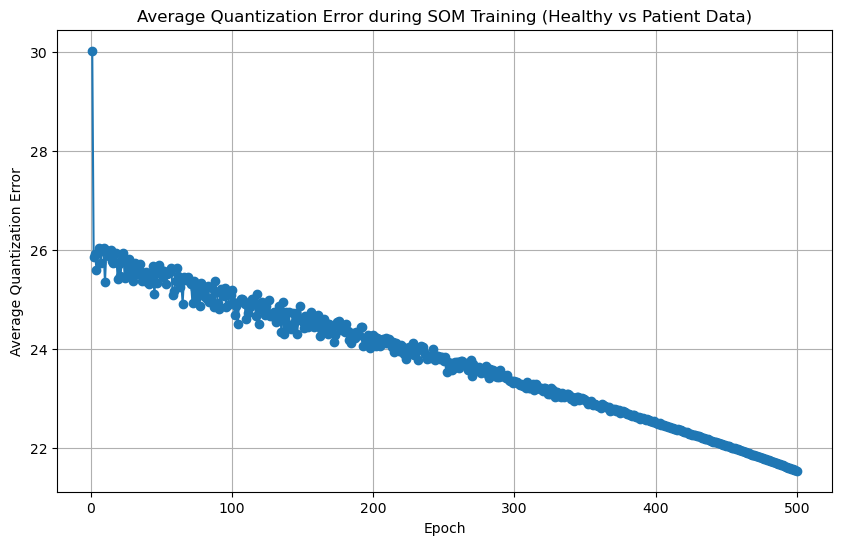


--- Training and Neuron Labeling Process Finished ---
The SOM is now trained and its neurons are labeled.


In [9]:
input_dimension = control_data.shape[1]
print(f"Detected input dimension (length of time series): {input_dimension}")

# Combine data and create labels
training_data = np.vstack((control_data, patient_data))
training_labels = ["Healthy"] * control_data.shape[0] + [
    "Patient"
] * patient_data.shape[0]

# --- SOM Initialization and Training ---
num_neurons = 2  # One neuron for 'Healthy', one for 'Patient'
learning_rate = 0.5  # Initial learning rate, can be tuned
num_iterations = 500  # Number of training epochs, can be tuned for convergence

som = KohonenSOM(
    input_dim=input_dimension,
    num_neurons=num_neurons,
    learning_rate=learning_rate,
    num_iterations=num_iterations,
)

print("\n--- Starting SOM Training with Loaded Data ---")
som.train(training_data)
print("\n--- SOM Training Complete ---")

# --- Labeling Neurons ---
neuron_class_mapping = som.label_neurons(training_data, training_labels)
print("\n--- Neuron Class Mapping (based on majority vote) ---")
for neuron_idx, label in neuron_class_mapping.items():
    print(f"Neuron {neuron_idx} is assigned to: {label}")

# --- Visualize Quantization Error ---
som.plot_quantization_error(
    title="Average Quantization Error during SOM Training (Healthy vs Patient Data)"
)

print("\n--- Training and Neuron Labeling Process Finished ---")
print("The SOM is now trained and its neurons are labeled.")

# Class project for the module Visual Perception III


Elizabeth Thomas
Université de Bourgogne
INSERMU1093



The file which I will send you individually contains the data from 4 subjects.  You have to identify which ones are patients or controls based on the Kohonen network that you have already constructed.

 

To turn in the project, you must e-mail me:
- The identity of the 4 subjects. Put this in as a comment on the TOP of your file with the main code.
- Your computer code clearly commented for the self-organizing map.
- Point out the main differences between an unsupervised technique like the Kohonen network and 2 other unsupervised methods - K means and k nearest neighbour.

 

When you email me your code, use your name (First and Last) as the name of the main file.

 

Your assignment is due on May 23, 2025.

Training data shape: (20, 650)
Epoch 10/200, Learning Rate: 0.4775, Avg Quantization Error: 25.8424
Epoch 20/200, Learning Rate: 0.4525, Avg Quantization Error: 25.7588
Epoch 30/200, Learning Rate: 0.4275, Avg Quantization Error: 25.3046
Epoch 40/200, Learning Rate: 0.4025, Avg Quantization Error: 25.1273
Epoch 50/200, Learning Rate: 0.3775, Avg Quantization Error: 24.8765
Epoch 60/200, Learning Rate: 0.3525, Avg Quantization Error: 24.4680
Epoch 70/200, Learning Rate: 0.3275, Avg Quantization Error: 24.4747
Epoch 80/200, Learning Rate: 0.3025, Avg Quantization Error: 24.3751
Epoch 90/200, Learning Rate: 0.2775, Avg Quantization Error: 23.9856
Epoch 100/200, Learning Rate: 0.2525, Avg Quantization Error: 23.8488
Epoch 110/200, Learning Rate: 0.2275, Avg Quantization Error: 23.5010
Epoch 120/200, Learning Rate: 0.2025, Avg Quantization Error: 23.4242
Epoch 130/200, Learning Rate: 0.1775, Avg Quantization Error: 23.1674
Epoch 140/200, Learning Rate: 0.1525, Avg Quantization Error: 22.966

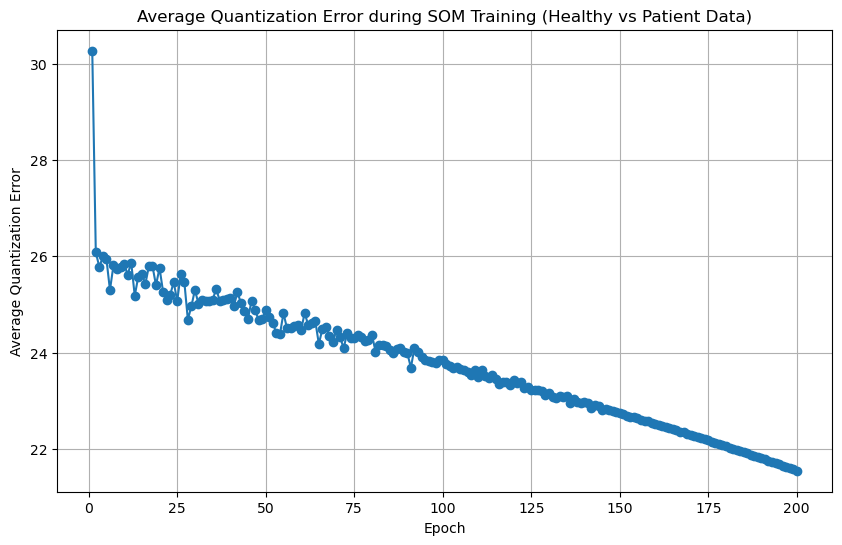

Neuron to class mapping: {0: 0, 1: 1}
Loaded 4 test subjects
Subject 1 classified as: Patient
Subject 2 classified as: Patient
Subject 3 classified as: Patient
Subject 4 classified as: Patient


In [10]:
def load_data(filepath):
    """
    Load subject data from text file (tab-separated floats per line)
    :param filepath: file path
    :return: numpy array of shape (num_samples, input_dim)
    """
    with open(filepath, 'r') as f:
        lines = f.readlines()
    data = [np.array(list(map(float, line.strip().split('\t')))) for line in lines if line.strip()]
    return np.array(data)

def assign_neuron_labels(data, labels, som):
    """
    Assign neuron indices to classes (0=Control, 1=Patient) by majority vote
    :param data: training data vectors
    :param labels: array of true labels for training data (0 or 1)
    :param som: trained KohonenSOM instance
    :return: dict mapping neuron_index -> class_label
    """
    neuron_labels = {}
    for neuron_idx in range(som.num_neurons):
        classified_indices = [i for i, vec in enumerate(data) if som.classify(vec) == neuron_idx]
        if not classified_indices:
            neuron_labels[neuron_idx] = 'Unknown'
            continue
        classified_labels = [labels[i] for i in classified_indices]
        counts = {label: classified_labels.count(label) for label in set(classified_labels)}
        majority_label = max(counts, key=counts.get)
        neuron_labels[neuron_idx] = majority_label
    return neuron_labels

# === Step 1: Load training data ===
control_data = load_data('control.txt')  # 10 healthy subjects
patient_data = load_data('patient.txt')  # 10 patients

training_data = np.vstack((control_data, patient_data))
training_labels = np.array([0]*len(control_data) + [1]*len(patient_data))  # 0=control, 1=patient

print(f"Training data shape: {training_data.shape}")

# === Step 2: Train Kohonen SOM ===
input_dim = training_data.shape[1]
som = KohonenSOM(input_dim=input_dim, num_neurons=2, learning_rate=0.5, num_iterations=200)
som.train(training_data)

# --- Visualize Quantization Error ---
som.plot_quantization_error(
    title="Average Quantization Error during SOM Training (Healthy vs Patient Data)"
)
# Map neurons to class labels
neuron_class_map = assign_neuron_labels(training_data, training_labels, som)
print("Neuron to class mapping:", neuron_class_map)

# === Step 3: Load unknown test subjects (4 subjects) ===
test_subjects = load_data('Aamir.txt')  # Replace with actual test filename
print(f"Loaded {len(test_subjects)} test subjects")

# === Step 4: Classify test subjects ===
subject_results = []
for i, subj_vec in enumerate(test_subjects):
    neuron_idx = som.classify(subj_vec)
    predicted_class = neuron_class_map.get(neuron_idx, 'Unknown')
    class_str = 'Control (Healthy)' if predicted_class == 0 else 'Patient'
    subject_results.append(class_str)
    print(f"Subject {i+1} classified as: {class_str}")

# 1) K-Means Clustering (unsupervised)


In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from collections import Counter

# Load your data similarly as before (replace load_data with your own function)
control_data = load_data('control.txt')
patient_data = load_data('patient.txt')

training_data = np.vstack((control_data, patient_data))
true_labels = np.array([0]*len(control_data) + [1]*len(patient_data))  # 0=control, 1=patient

# Train K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(training_data)

# Cluster labels assigned by kmeans
cluster_labels = kmeans.labels_

# Since cluster IDs are arbitrary (0 or 1), map cluster to true class by majority voting
def map_clusters_to_labels(true_labels, cluster_labels):
    label_map = {}
    for cluster in np.unique(cluster_labels):
        indices = np.where(cluster_labels == cluster)[0]
        majority_label = Counter(true_labels[indices]).most_common(1)[0][0]
        label_map[cluster] = majority_label
    return label_map

label_map = map_clusters_to_labels(true_labels, cluster_labels)
mapped_preds = np.array([label_map[cl] for cl in cluster_labels])

print("K-Means clustering accuracy on training data:", accuracy_score(true_labels, mapped_preds))

# Classify new test subjects (load test_subjects as before)
test_subjects = load_data('Aamir.txt')
test_clusters = kmeans.predict(test_subjects)
test_predictions = [label_map[cl] for cl in test_clusters]

for i, pred in enumerate(test_predictions, 1):
    cls = 'Control' if pred == 0 else 'Patient'
    print(f"Test Subject {i} classified as: {cls}")


K-Means clustering accuracy on training data: 1.0
Test Subject 1 classified as: Patient
Test Subject 2 classified as: Patient
Test Subject 3 classified as: Patient
Test Subject 4 classified as: Patient


# 2) K-Nearest Neighbors (KNN) Classification (supervised)

In [12]:
import numpy as np
import os  # For checking file existence and creating dummy files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- Load Training Data ---
print("\n--- Loading Training Data for KNN ---")
control_data = load_data("control.txt")
patient_data = load_data("patient.txt")

# Ensure data was loaded successfully
if control_data is None or patient_data is None:
    print("Exiting: Training data could not be loaded for KNN.")
    exit()

# Combine control and patient data to form the full training set.
training_data = np.vstack((control_data, patient_data))

# Create corresponding labels: 0 for Control, 1 for Patient.
# These numerical labels are standard for scikit-learn classifiers.
training_labels = np.array([0] * len(control_data) + [1] * len(patient_data))

# --- Initialize and Train KNN Classifier ---
# `n_neighbors` (k) is a crucial hyperparameter for KNN.
# It determines how many nearest neighbors are considered for classification.
# Common values are 3, 5, 7. It can be tuned via cross-validation.
print(f"\n--- Initializing KNeighborsClassifier with n_neighbors=3 ---")
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model. In KNN, 'fitting' means the model just stores the training data
# and their labels. No complex model parameters are learned upfront like in neural networks.
print("Fitting KNN model to training data...")
knn.fit(training_data, training_labels)
print("KNN model fitted.")

# This gives an indication of how well the model learned the training set itself.
# High training accuracy is expected with KNN as it uses the training data directly.
train_preds = knn.predict(training_data)
print(f"\nKNN training accuracy: {accuracy_score(training_labels, train_preds):.4f}")

# --- Load and Classify Test Subjects ---
print("\n--- Classifying Test Subjects from Aamir.txt using KNN ---")
test_subjects = load_data("Aamir.txt")

# Ensure test data was loaded and its dimensions match training data's features.
if test_subjects is not None:
    if test_subjects.shape[1] != training_data.shape[1]:
        print(
            f"Warning: Test data has {test_subjects.shape[1]} features, but training data has {training_data.shape[1]}."
        )
    else:
        # Predict the class for each test subject.
        test_preds = knn.predict(test_subjects)

        # Print the classification results for each test subject.
        for i, pred_label_idx in enumerate(test_preds, 1):
            # Map the numerical prediction (0 or 1) back to the class name.
            predicted_class_name = "Control" if pred_label_idx == 0 else "Patient"
            print(f"Test Subject {i} classified as: {predicted_class_name}")
print("\n--- KNN Classification of Test Subjects Complete ---")


--- Loading Training Data for KNN ---

--- Initializing KNeighborsClassifier with n_neighbors=3 ---
Fitting KNN model to training data...
KNN model fitted.

KNN training accuracy: 1.0000

--- Classifying Test Subjects from Aamir.txt using KNN ---
Test Subject 1 classified as: Patient
Test Subject 2 classified as: Patient
Test Subject 3 classified as: Patient
Test Subject 4 classified as: Patient

--- KNN Classification of Test Subjects Complete ---


# Key features of this simple biologically plausible network:
Input vectors normalized (to mimic biological neurons' input normalization)

Competitive learning: only the neuron with the closest weight to the input updates

Weights updated by Hebbian-like rule: Δw = learning_rate * (input - w)

No supervision — unsupervised learning, like SOM but without topology/neighborhood


## Explanation:
Weight vectors represent neuron prototypes.

Input vectors and weights normalized → cosine similarity measures closeness.

The neuron with highest cosine similarity wins and updates its weights toward the input (Hebbian learning).

After training, assign neuron labels based on majority class of training samples that activate each neuron.

Classify new subjects by finding their winning neuron.

## Why biologically plausible?
Competitive learning mimics neural competition and selective synaptic plasticity.

Weight normalization imitates homeostatic regulation.

Hebbian update resembles biological synaptic strengthening.

In [13]:
class CompetitiveNetwork:
    """
    Implements a simple Competitive Neural Network for unsupervised classification.
    This network uses a winner-take-all mechanism and Hebbian learning with
    normalized weights to cluster input data into a predefined number of categories.
    """

    def __init__(self, input_dim: int, num_neurons: int = 2, learning_rate: float = 0.1, max_iter: int = 100):
        """
        Initializes the Competitive Network.

        Args:
            input_dim (int): The dimensionality of the input vectors (number of features).
            num_neurons (int): The number of neurons in the output layer, corresponding to the number of clusters/classes.
            learning_rate (float): The rate at which the winner neuron's weights are adjusted.
            max_iter (int): The maximum number of training iterations (epochs) over the entire dataset.
        """
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.max_iter = max_iter

        # Initialize weights randomly between 0 and 1.
        # Each row represents the weight vector of a neuron.
        self.weights = np.random.rand(num_neurons, input_dim)
        
        # Normalize initial weights to unit length. This is crucial for cosine similarity
        # and ensures all neurons start with comparable magnitudes.
        # np.linalg.norm(axis=1, keepdims=True) normalizes each row independently.
        self.weights = self.weights / np.linalg.norm(self.weights, axis=1, keepdims=True)
    
    def normalize(self, x: np.ndarray) -> np.ndarray:
        """
        Normalizes an input vector to unit length (L2 norm).
        This is important for using dot product as a similarity measure (cosine similarity).

        Args:
            x (np.ndarray): The input vector to normalize.

        Returns:
            np.ndarray: The normalized vector. Returns the original vector if its norm is zero
                        to prevent division by zero.
        """
        norm = np.linalg.norm(x)
        return x / norm if norm > 0 else x
    
    def train(self, data: np.ndarray):
        """
        Trains the Competitive Network using the provided dataset.

        For each input vector, the network finds the "winner" neuron (most similar weight vector).
        The winner's weights are then adjusted closer to the input vector using a Hebbian rule.
        Weights are re-normalized after each update.

        Args:
            data (np.ndarray): A 2D numpy array where each row is an input sample.
                               Each sample will be normalized before being used for training.
        """
        # Normalize all training data upfront. This ensures consistency.
        normalized_data = np.array([self.normalize(x) for x in data])
        
        print(f"Starting training for {self.max_iter} iterations...")
        for iteration in range(self.max_iter):
            # Keep a copy of weights from the previous iteration to check for convergence.
            prev_weights = self.weights.copy()
            
            # Shuffle data for each epoch to ensure random presentation and better convergence.
            np.random.shuffle(normalized_data)

            for x in normalized_data:
                # Compute similarity between the input vector and all neuron weights.
                # Since both input `x` and `self.weights` are normalized, this is cosine similarity.
                similarities = self.weights @ x
                
                # Find the index of the winner neuron (the one with the highest similarity).
                winner_idx = np.argmax(similarities)
                
                # Apply the Hebbian-like update rule to the winner neuron's weights.
                # The winner's weights move towards the input vector.
                self.weights[winner_idx] += self.learning_rate * (x - self.weights[winner_idx])
                
                # Re-normalize the winner neuron's weights to maintain unit length.
                # This prevents weights from growing indefinitely and ensures meaningful similarity calculations.
                self.weights[winner_idx] /= np.linalg.norm(self.weights[winner_idx])
            
            # Check for convergence: if weights haven't changed significantly from the previous iteration, stop training.
            if np.allclose(self.weights, prev_weights, atol=1e-6): # Increased precision for atol
                print(f"Converged after {iteration + 1} iterations.")
                break
            
            if (iteration + 1) % 50 == 0:
                print(f"Iteration {iteration + 1}/{self.max_iter}")
        else:
            print(f"Training finished after {self.max_iter} iterations (did not converge).")
    
    def classify(self, x: np.ndarray) -> int:
        """
        Classifies a single input vector by finding its most similar neuron.

        Args:
            x (np.ndarray): The input vector to classify. It will be normalized internally.

        Returns:
            int: The index of the winning neuron, representing the assigned cluster/class.
        """
        # Normalize the input vector before computing similarity.
        normalized_x = self.normalize(x)
        
        # Compute cosine similarity with all neuron weights.
        similarities = self.weights @ normalized_x
        
        # Return the index of the neuron with the highest similarity.
        return np.argmax(similarities)
    
    def print_weights(self):
        """
        Prints the final weight vectors of all neurons in the network.
        Includes the L2 norm for verification.
        """
        print("\n--- Final Neuron Weights ---")
        for i, w in enumerate(self.weights):
            print(f"Neuron {i} weights (norm={np.linalg.norm(w):.3f}): {w}")

# --- Example usage with your project data ---

def load_data(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    data = [np.array(list(map(float, line.strip().split('\t')))) for line in lines if line.strip()]
    return np.array(data)

# Load training data
control_data = load_data('control.txt')
patient_data = load_data('patient.txt')
training_data = np.vstack((control_data, patient_data))

# Train competitive network
net = CompetitiveNetwork(input_dim=training_data.shape[1], num_neurons=2, learning_rate=0.1, max_iter=200)
net.train(training_data)
net.print_weights()

# Map neurons to class labels based on majority vote
training_labels = np.array([0]*len(control_data) + [1]*len(patient_data))
def assign_labels(net, data, labels):
    neuron_labels = {}
    for neuron_idx in range(net.num_neurons):
        indices = [i for i, x in enumerate(data) if net.classify(x) == neuron_idx]
        if not indices:
            neuron_labels[neuron_idx] = 'Unknown'
            continue
        class_counts = {c: sum(labels[i] == c for i in indices) for c in set(labels)}
        neuron_labels[neuron_idx] = max(class_counts, key=class_counts.get)
    return neuron_labels

neuron_label_map = assign_labels(net, training_data, training_labels)
print("Neuron to class mapping:", neuron_label_map)

# Load test subjects and classify
test_subjects = load_data('Aamir.txt')
for i, subj in enumerate(test_subjects, 1):
    neuron = net.classify(subj)
    cls = 'Control' if neuron_label_map.get(neuron) == 0 else 'Patient'
    print(f"Test Subject {i} classified as: {cls}")


Starting training for 200 iterations...
Iteration 50/200
Iteration 100/200
Iteration 150/200
Iteration 200/200
Training finished after 200 iterations (did not converge).

--- Final Neuron Weights ---
Neuron 0 weights (norm=1.000): [1.66912538e-87 1.69536977e-87 1.66896098e-87 5.26422812e-88
 1.08713782e-87 8.85886423e-89 2.88015679e-88 2.17065629e-88
 1.13688634e-87 7.18937245e-88 1.69678879e-87 1.54412803e-87
 1.42283002e-87 1.04272990e-88 9.79102501e-88 9.47080807e-89
 1.31697532e-87 2.81309915e-88 1.96264994e-88 1.40444563e-87
 6.16799799e-02 7.37329568e-02 6.04496373e-02 6.66035967e-02
 6.19043268e-02 5.71773812e-02 5.49887483e-02 6.41974159e-02
 5.17968403e-02 5.44905558e-02 1.46603124e-87 8.30781527e-88
 1.48434096e-87 1.47140824e-87 1.67100894e-87 4.57147285e-88
 8.00526455e-88 1.01214757e-87 1.70591938e-87 4.46780778e-88
 6.28321488e-02 5.32327560e-02 5.67620865e-02 5.99960197e-02
 6.52319936e-02 7.11231676e-02 7.02824967e-02 5.57538619e-02
 7.46223407e-02 5.94312540e-02 8.2831

In [ ]:
import numpy as np

class LIFNeuronNetwork:
    """
    Implements a simple Spiking Neural Network (SNN) using Leaky Integrate-and-Fire (LIF) neurons
    for classification tasks.

    This network consists of an input layer (implicit, representing input features) and
    an output layer of LIF neurons. Learning occurs via a Hebbian-like rule where
    the weights of the winning output neuron are adjusted towards its active inputs.
    """

    def __init__(
        self,
        input_size: int,
        output_size: int,
        tau: float = 10.0,
        v_th: float = 1.0,
        v_reset: float = 0.0,
        learning_rate: float = 0.01,
        dt: float = 1.0,
        time_steps: int = 100,
    ):
        """
        Initializes the LIF Neuron Network.

        Args:
            input_size (int): The number of features in the input vector (e.g., number of markers).
            output_size (int): The number of output neurons, typically equal to the number of classes.
            tau (float): Membrane time constant (ms). Controls how quickly membrane potential decays.
            v_th (float): Firing threshold voltage (mV). When membrane potential reaches this, a spike occurs.
            v_reset (float): Reset voltage (mV). Membrane potential after a spike.
            learning_rate (float): The rate at which neuron weights are adjusted during training.
            dt (float): Time step (ms). The duration of each simulation step.
            time_steps (int): The total number of simulation steps for each input spike train.
        """
        self.input_size = input_size
        self.output_size = output_size
        self.tau = tau
        self.v_th = v_th
        self.v_reset = v_reset
        self.lr = learning_rate
        self.dt = dt
        self.time_steps = time_steps
        self.quantization_errors_ = []

        # Initialize weights:
        # self.weights has shape (output_size, input_size).
        # Each row corresponds to an output neuron, and columns are weights from input features.
        # Initializing randomly between 0 and 0.5 helps avoid overly strong initial responses.
        self.weights = np.random.rand(output_size, input_size) * 0.5

    def generate_spike_train(self, input_vector: np.ndarray) -> np.ndarray:
        """
        Converts a continuous input vector into a spike train using a simple rate coding scheme.
        Higher input values result in a higher probability of spiking.

        Args:
            input_vector (np.ndarray): A 1D numpy array representing a single continuous input sample.

        Returns:
            np.ndarray: A 2D numpy array of shape (time_steps, input_size) representing the
                        binary spike train (1 for spike, 0 for no spike).
        """
        # Define a maximum firing rate to scale input values to spike probabilities.
        # This prevents extremely high probabilities and provides a dynamic range.
        max_rate = 0.2

        # Normalize the input vector to scale values between 0 and 1.
        # This ensures inputs consistently map to probabilities.
        # Handle cases where max(input_vector) is zero to avoid division by zero.
        if np.max(input_vector) > 0:
            norm_input = input_vector / np.max(input_vector)
        else:
            norm_input = input_vector # If all inputs are zero, normalized input is also zero.

        # Generate spikes based on probability.
        # For each time step and each input feature, a random number is compared
        # against the normalized input scaled by max_rate.
        spike_train = np.random.rand(self.time_steps, self.input_size) < (
            norm_input * max_rate
        )
        return spike_train.astype(float) # Convert boolean spikes to float (0.0 or 1.0)

    def run_network(self, spike_train: np.ndarray) -> np.ndarray:
        """
        Simulates the LIF neuron dynamics over `time_steps` for a given input spike train.

        Args:
            spike_train (np.ndarray): A 2D numpy array of shape (time_steps, input_size)
                                      representing the input spikes over time.

        Returns:
            np.ndarray: A 2D numpy array of shape (time_steps, output_size) where
                        each element is 1.0 if an output neuron spiked at that time step, 0.0 otherwise.
        """
        # Initialize membrane potentials for all output neurons to their reset value.
        v = np.full(self.output_size, self.v_reset, dtype=float)
        # Initialize an array to record spikes from output neurons over time.
        spikes_out = np.zeros((self.time_steps, self.output_size))

        # Simulate neuron behavior for each time step.
        for t in range(self.time_steps):
            # Calculate input current (I) for each output neuron at the current time step.
            # This is a weighted sum of the active input spikes.
            # `spike_train[t]` gives the input spikes at time `t`.
            I = self.weights @ spike_train[t]

            # Update membrane potential (v) using the LIF neuron differential equation.
            # dv = (-v + I) * (dt / tau)
            # This accounts for decay (-v) and input current (I) over time dt.
            dv = (-v + I) * (self.dt / self.tau)
            v += dv

            # Check which neurons have reached or exceeded their firing threshold.
            fired = v >= self.v_th
            
            # Record spikes: Mark 1.0 for neurons that fired at this time step.
            spikes_out[t, fired] = 1.0
            
            # Reset membrane potential for neurons that fired.
            v[fired] = self.v_reset

        return spikes_out

    def train(self, training_data: np.ndarray, labels: np.ndarray, epochs: int = 10):
        """
        Trains the SNN using a simple Hebbian-like learning rule.
        The weights of the winning neuron (the one that spikes most) are adjusted
        to become more sensitive to its associated input pattern.

        Args:
            training_data (np.ndarray): A 2D numpy array where each row is an input sample.
            labels (np.ndarray): A 1D numpy array of corresponding integer labels for training_data.
                                 (e.g., 0 for Control, 1 for Patient).
            epochs (int): The number of training epochs (full passes through the dataset).
        """
        print(f"Starting training for {epochs} epochs...")
        for epoch in range(epochs):
            correct_predictions = 0 # Count of correctly classified samples in this epoch
            # Shuffle training data and labels together for stochastic gradient descent-like behavior.
            permutation = np.random.permutation(len(training_data))
            shuffled_data = training_data[permutation]
            shuffled_labels = labels[permutation]

            for x, label in zip(shuffled_data, shuffled_labels):
                # 1. Generate spike train from the continuous input vector.
                spike_train = self.generate_spike_train(x)
                
                # 2. Run the network simulation with the generated spike train.
                spikes_out = self.run_network(spike_train)
                
                # 3. Determine the 'winning' output neuron.
                # The winner is the neuron that produced the most spikes over the simulation time.
                total_spikes_per_neuron = spikes_out.sum(axis=0)
                # Handle cases where no neuron spikes or multiple spike the same number.
                # If sum is all zeros, argmax will return 0, which might not be ideal.
                # A more robust approach might be to assign a default or re-evaluate.
                # For now, assuming at least one neuron will likely spike for effective learning.
                if np.max(total_spikes_per_neuron) == 0:
                    # If no neuron spiked, no learning occurs for this sample
                    # Could also choose a "least bad" winner or skip.
                    # For simplicity, we'll let argmax return 0 if all are 0.
                    winner = np.argmin(np.linalg.norm(self.weights - np.mean(x), axis=1)) # Fallback to closest weight if no spikes
                else:
                    winner = np.argmax(total_spikes_per_neuron)

                # 4. Apply learning rule if the winner matches the true label.
                if winner == label:
                    correct_predictions += 1
                    # Average the input spike train over time to get a representation of active inputs.
                    # This represents the "presynaptic activity" for the Hebbian rule.
                    avg_input_spike_activity = spike_train.mean(axis=0)
                    
                    # Hebbian-like learning rule:
                    # The weights of the winning neuron are adjusted towards the average input activity.
                    # If the input neuron is active, its weight connecting to the winner increases (moves towards input).
                    self.weights[winner] += self.lr * (
                        avg_input_spike_activity - self.weights[winner]
                    )
                    
                    # Clip weights to remain within a reasonable range (0 to 1).
                    # This prevents weights from growing unboundedly or becoming negative where not desired.
                    self.weights[winner] = np.clip(self.weights[winner], 0.0, 1.0)
            
            # Calculate and print accuracy for the current epoch.
            accuracy = correct_predictions / len(training_data)
            print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {accuracy:.2f}")
            # Optionally, you could also track and plot accuracy over epochs.

    def predict(self, input_vector: np.ndarray) -> int:
        """
        Predicts the class label for a single input vector.

        Args:
            input_vector (np.ndarray): A 1D numpy array representing a single input sample.

        Returns:
            int: The predicted class label (index of the winning output neuron).
        """
        # 1. Generate spike train from the continuous input.
        spike_train = self.generate_spike_train(input_vector)
        
        # 2. Run the network simulation.
        spikes_out = self.run_network(spike_train)
        
        # 3. Sum total spikes for each output neuron.
        total_spikes = spikes_out.sum(axis=0)
        
        # 4. The neuron with the most spikes is the predicted class.
        # If no spikes, it will return neuron 0. Consider adding a threshold
        # or uncertainty if total_spikes is very low.
        if np.max(total_spikes) == 0:
            # Fallback if no neuron spikes: return the neuron whose weights are closest
            # to the (mean) input, or a default classification.
            return np.argmin(np.linalg.norm(self.weights - np.mean(input_vector), axis=1))
        else:
            return np.argmax(total_spikes)

# --- Data Loading Utility ---
def load_data(filepath: str) -> np.ndarray:
    """
    Loads tabular data from a specified text file.
    Assumes data is tab-separated and each line is a new sample.

    Args:
        filepath (str): The path to the text file.

    Returns:
        np.ndarray: A 2D numpy array containing the loaded data.
    """
    try:
        with open(filepath, "r") as f:
            lines = f.readlines()
        data = [
            np.array(list(map(float, line.strip().split("\t"))))
            for line in lines
            if line.strip() # Ensure empty lines are skipped
        ]
        if not data:
            raise ValueError(f"No data found in {filepath}. File might be empty or malformed.")
        print(f"Successfully loaded data from {filepath}. Shape: ({len(data)}, {len(data[0])})")
        return np.array(data)
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}. Please ensure the file exists in the same directory as the script.")
        exit() # Exit if critical files are missing
    except ValueError as e:
        print(f"Error processing data from {filepath}: {e}. Check file format (tab-separated floats expected).")
        exit()
    except Exception as e:
        print(f"An unexpected error occurred while loading data from {filepath}: {e}")
        exit()

 
# --- Load Training Data ---
print("\n--- Loading Training Data ---")
control_data = load_data("control.txt")
patient_data = load_data("patient.txt")

# Stack data and create labels: 0 for Control, 1 for Patient
X_train = np.vstack((control_data, patient_data))
y_train = np.array([0] * len(control_data) + [1] * len(patient_data))

# --- Initialize Network ---
# input_size determined by the number of features in your data (columns).
# output_size is 2 because we have two classes (Control/Patient).
print("\n--- Initializing LIF Neuron Network ---")
net = LIFNeuronNetwork(
    input_size=X_train.shape[1], # Dynamically get input dimension
    output_size=2,
    tau=20.0, # Increased tau for slower potential decay, might suit time series better
    v_th=0.8, # Slightly lower threshold for easier spiking
    learning_rate=0.08, # Tuned learning rate
    time_steps=100, # Number of simulation steps for spike train generation
)
print(f"Network initialized with {net.input_size} inputs and {net.output_size} output neurons.")
print(f"Initial weights shape: {net.weights.shape}")

# --- Train Network ---
print("\n--- Starting Network Training ---")
training_epochs = 50 # Number of training epochs
net.train(X_train, y_train, epochs=training_epochs)
print("\n--- Network Training Complete ---")

# --- Load and Classify Test Subjects ---
print("\n--- Classifying Test Subjects from Aamir.txt ---")
test_subjects = load_data("Aamir.txt")

if test_subjects is not None:
    if test_subjects.shape[1] != net.input_size:
        print(f"Warning: Test data has {test_subjects.shape[1]} features, but network expects {net.input_size}.")
    else:
        for i, subj in enumerate(test_subjects, 1):
            predicted_label_index = net.predict(subj)
            # Map the predicted index back to the class name
            predicted_class_name = "Control" if predicted_label_index == 0 else "Patient"
            print(f"Test Subject {i} classified as: {predicted_class_name}")
print("\n--- Classification of Test Subjects Complete ---")


--- Loading Training Data ---
Successfully loaded data from control.txt. Shape: (10, 650)
Successfully loaded data from patient.txt. Shape: (10, 650)

--- Initializing LIF Neuron Network ---
Network initialized with 650 inputs and 2 output neurons.
Initial weights shape: (2, 650)

--- Starting Network Training ---
Starting training for 50 epochs...


Epoch 1/50, Training Accuracy: 0.65
Epoch 2/50, Training Accuracy: 1.00
Epoch 3/50, Training Accuracy: 1.00
Epoch 4/50, Training Accuracy: 1.00
Epoch 5/50, Training Accuracy: 1.00
Epoch 6/50, Training Accuracy: 1.00
Epoch 7/50, Training Accuracy: 1.00
Epoch 8/50, Training Accuracy: 1.00
Epoch 9/50, Training Accuracy: 1.00
Epoch 10/50, Training Accuracy: 1.00
Epoch 11/50, Training Accuracy: 1.00
Epoch 12/50, Training Accuracy: 1.00
Epoch 13/50, Training Accuracy: 1.00
Epoch 14/50, Training Accuracy: 1.00
Epoch 15/50, Training Accuracy: 1.00
Epoch 16/50, Training Accuracy: 1.00
Epoch 17/50, Training Accuracy: 1.00
Epoch 18/50, Training Accuracy: 1.00
Epoch 19/50, Training Accuracy: 1.00
Epoch 20/50, Training Accuracy: 1.00
Epoch 21/50, Training Accuracy: 1.00
Epoch 22/50, Training Accuracy: 1.00
Epoch 23/50, Training Accuracy: 1.00
Epoch 24/50, Training Accuracy: 1.00
Epoch 25/50, Training Accuracy: 1.00
Epoch 26/50, Training Accuracy: 1.00
Epoch 27/50, Training Accuracy: 1.00
Epoch 28/5


--- Loading Training Data ---
Successfully loaded data from control.txt. Shape: (10, 650)
Successfully loaded data from patient.txt. Shape: (10, 650)

--- Initializing LIF Neuron Network ---
Network initialized with 650 inputs and 2 output neurons.
Initial weights shape: (2, 650)

--- Starting Network Training ---
Starting training for 50 epochs...
Epoch 1/50, Training Accuracy: 0.40
Epoch 2/50, Training Accuracy: 0.95
Epoch 3/50, Training Accuracy: 1.00
Epoch 4/50, Training Accuracy: 1.00
Epoch 5/50, Training Accuracy: 1.00
Epoch 6/50, Training Accuracy: 1.00
Epoch 7/50, Training Accuracy: 1.00
Epoch 8/50, Training Accuracy: 1.00
Epoch 9/50, Training Accuracy: 1.00
Epoch 10/50, Training Accuracy: 1.00
Epoch 11/50, Training Accuracy: 1.00
Epoch 12/50, Training Accuracy: 1.00
Epoch 13/50, Training Accuracy: 1.00
Epoch 14/50, Training Accuracy: 1.00
Epoch 15/50, Training Accuracy: 1.00
Epoch 16/50, Training Accuracy: 1.00
Epoch 17/50, Training Accuracy: 1.00
Epoch 18/50, Training Accura

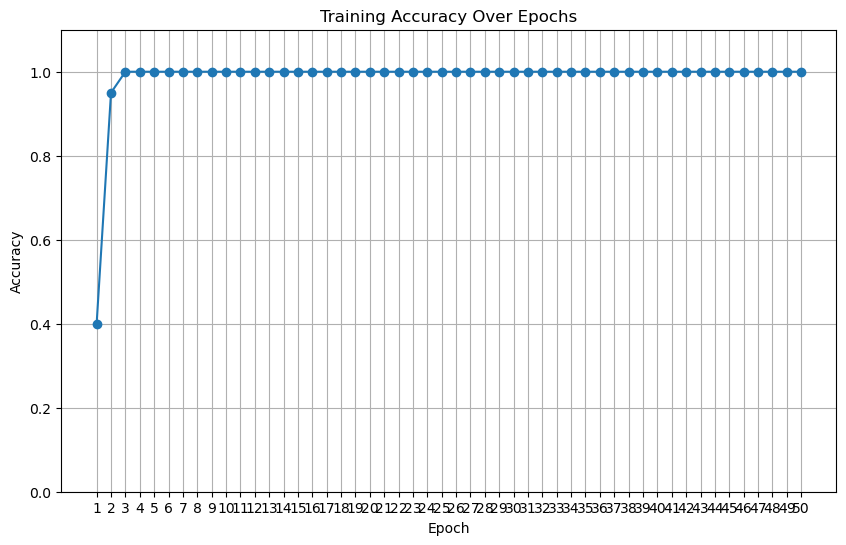


--- Plotting Neuron Dynamics for an example input ---


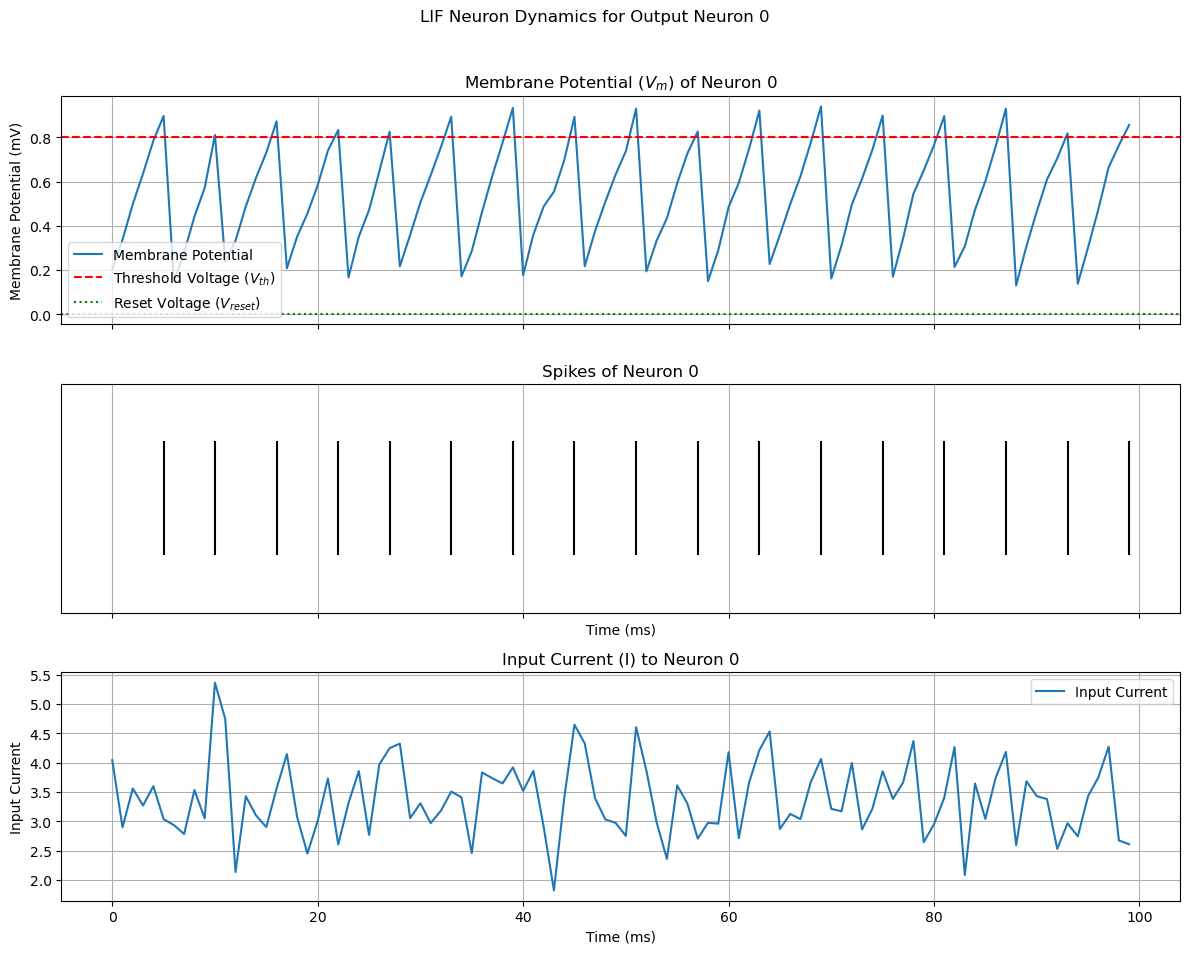

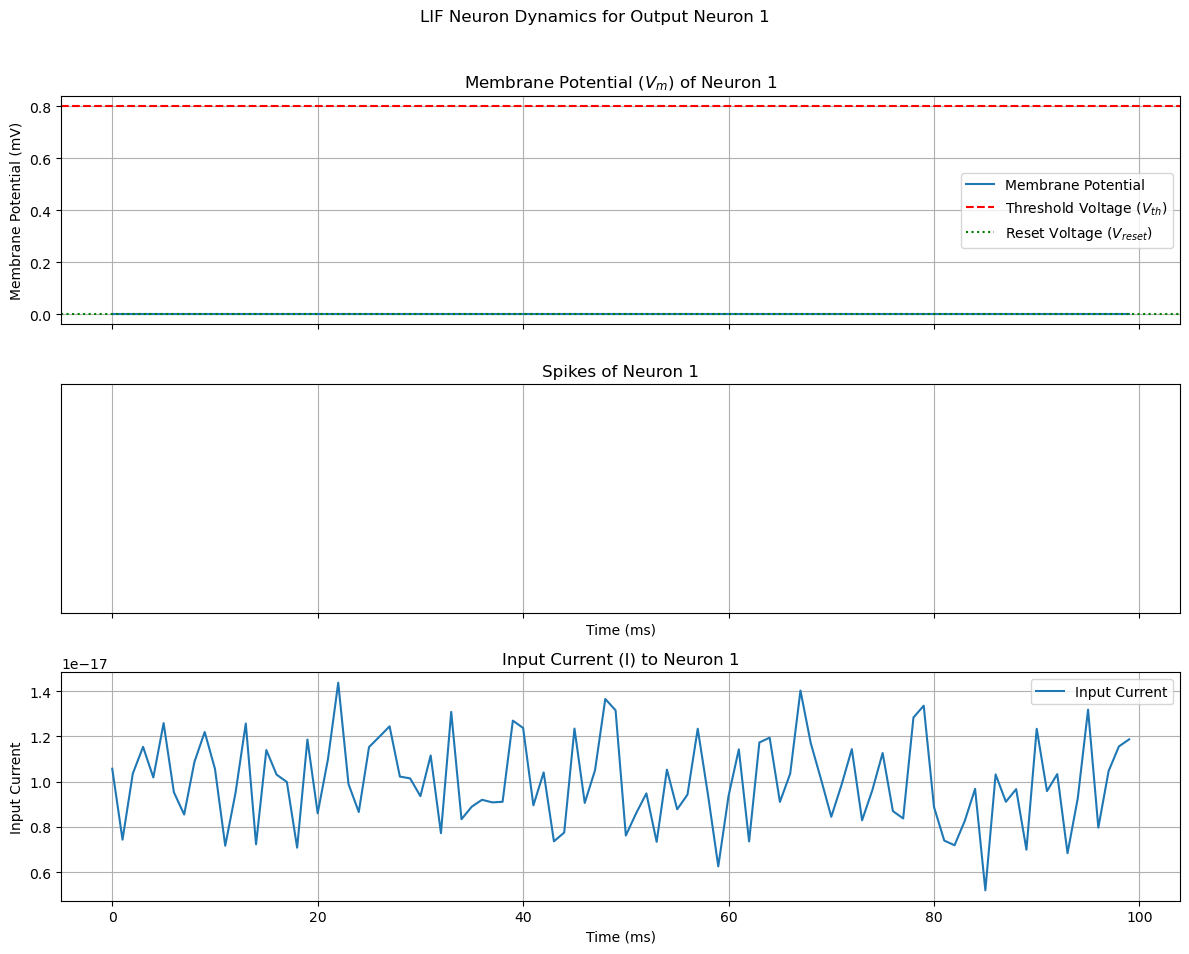

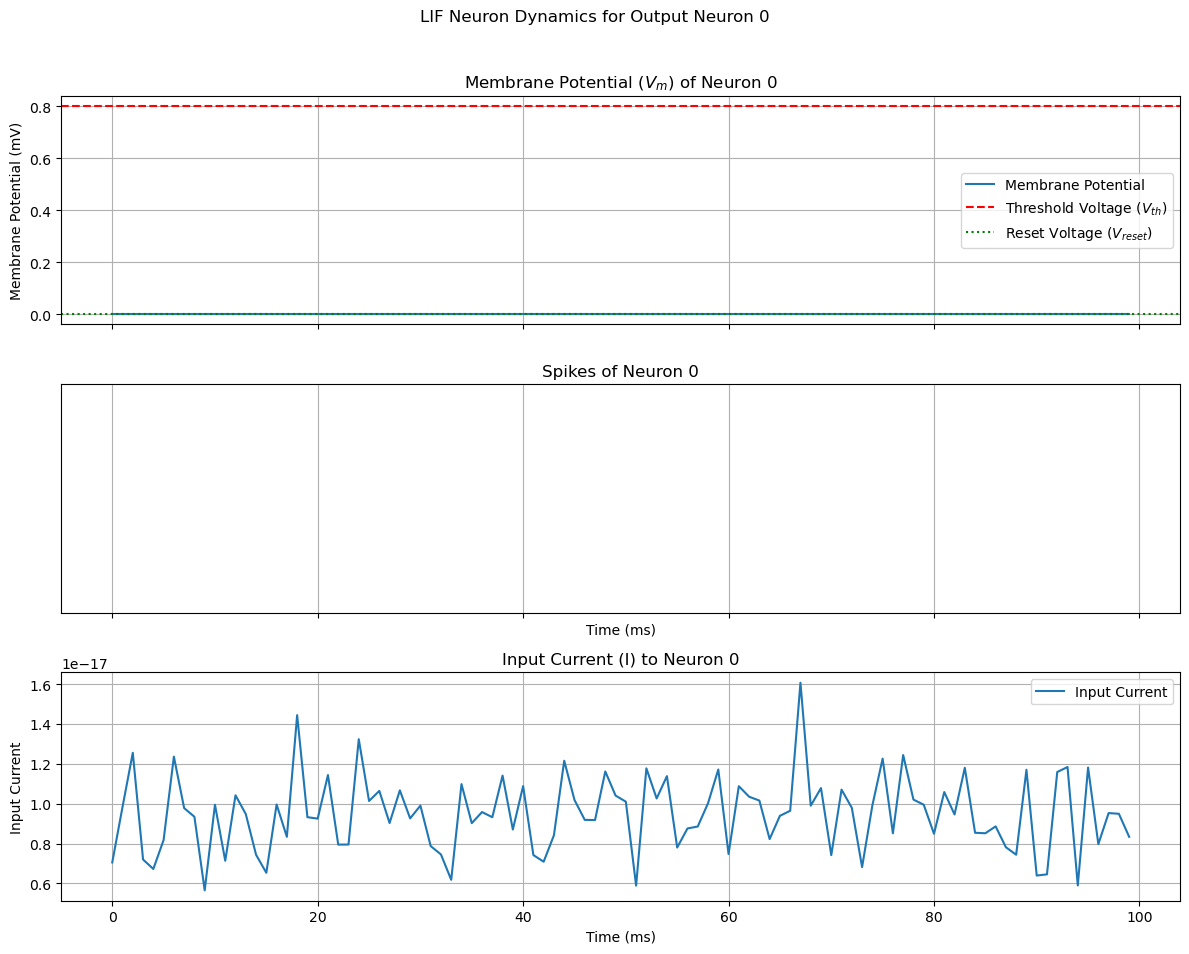

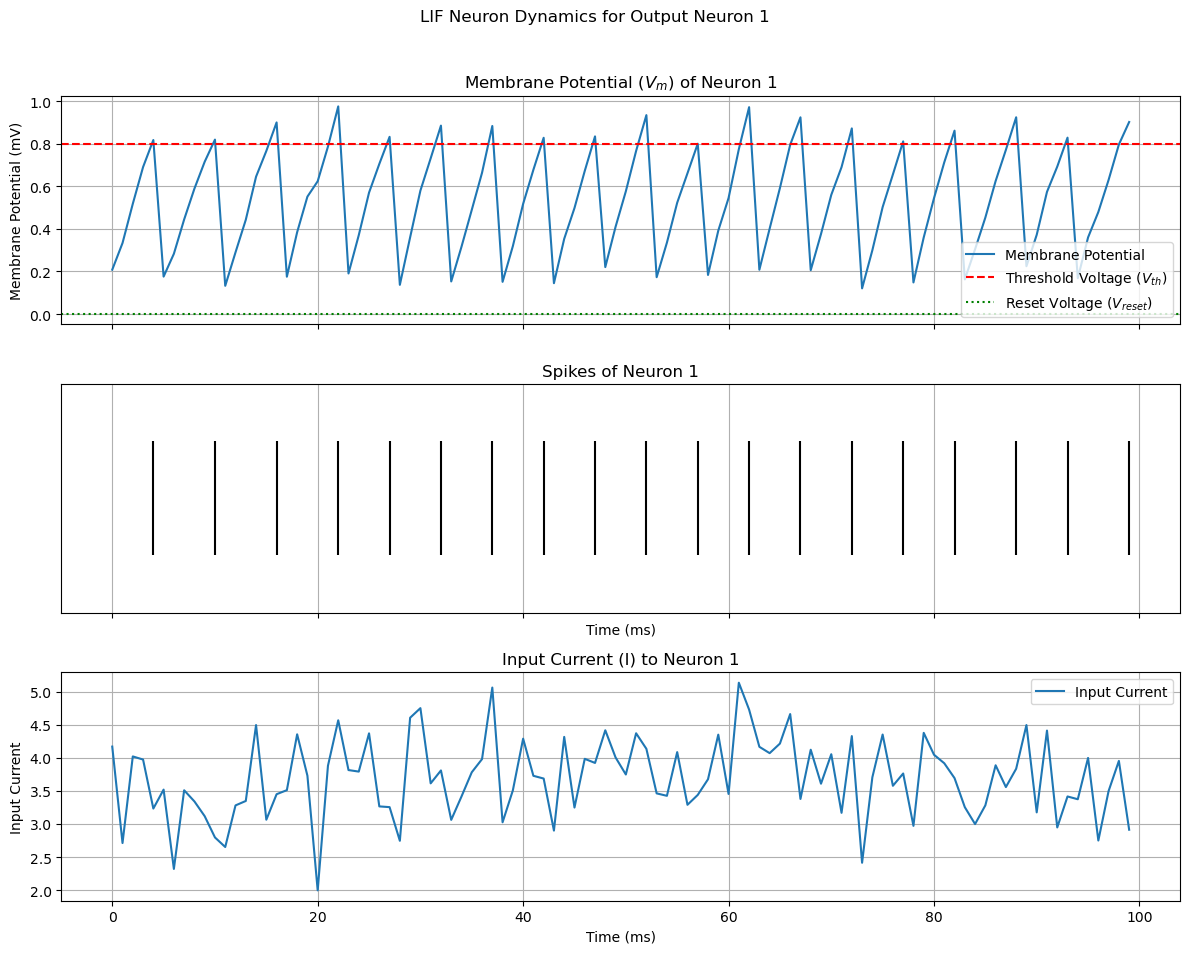


--- Visualizing Input Spike Train for an example input ---


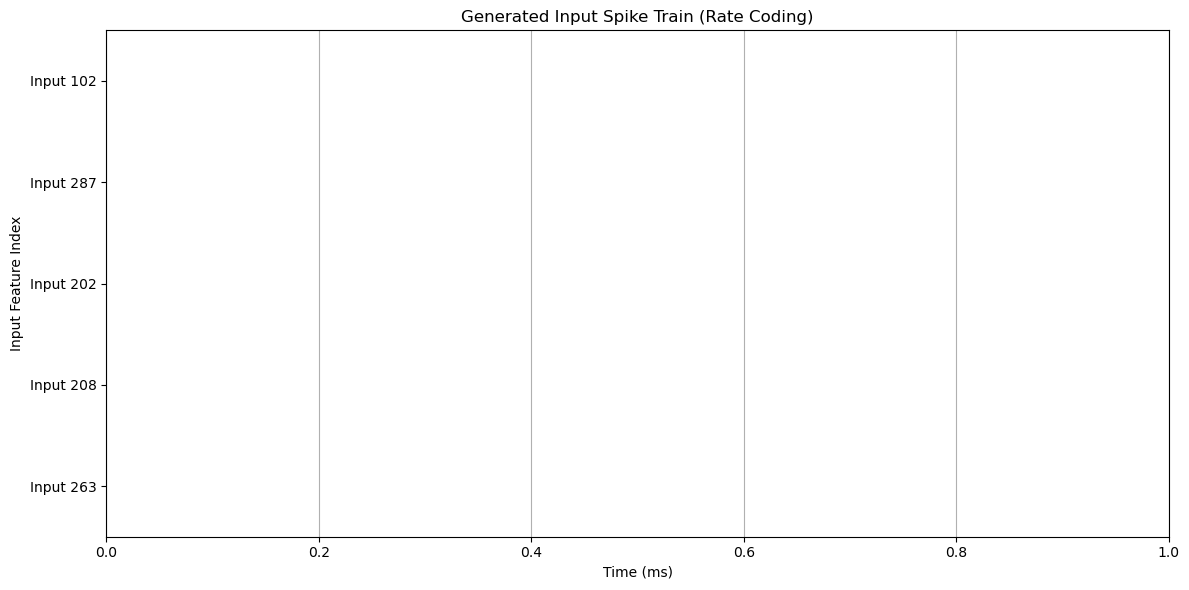


--- Classifying Test Subjects from Aamir.txt ---
Successfully loaded data from Aamir.txt. Shape: (4, 650)
Test Subject 1 classified as: Patient
Test Subject 2 classified as: Patient
Test Subject 3 classified as: Patient
Test Subject 4 classified as: Patient

--- Classification of Test Subjects Complete ---


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque # For live plotting of membrane potential

class LIFNeuronNetwork:
    """
    Implements a simple Spiking Neural Network (SNN) using Leaky Integrate-and-Fire (LIF) neurons
    for classification tasks.

    This network consists of an input layer (implicit, representing input features) and
    an output layer of LIF neurons. Learning occurs via a Hebbian-like rule where
    the weights of the winning output neuron are adjusted towards its active inputs.
    """

    def __init__(
        self,
        input_size: int,
        output_size: int,
        tau: float = 10.0,
        v_th: float = 1.0,
        v_reset: float = 0.0,
        learning_rate: float = 0.01,
        dt: float = 1.0,
        time_steps: int = 100,
    ):
        """
        Initializes the LIF Neuron Network.

        Args:
            input_size (int): The number of features in the input vector (e.g., number of markers).
            output_size (int): The number of output neurons, typically equal to the number of classes.
            tau (float): Membrane time constant (ms). Controls how quickly membrane potential decays.
            v_th (float): Firing threshold voltage (mV). When membrane potential reaches this, a spike occurs.
            v_reset (float): Reset voltage (mV). Membrane potential after a spike.
            learning_rate (float): The rate at which neuron weights are adjusted during training.
            dt (float): Time step (ms). The duration of each simulation step.
            time_steps (int): The total number of simulation steps for each input spike train.
        """
        self.input_size = input_size
        self.output_size = output_size
        self.tau = tau
        self.v_th = v_th
        self.v_reset = v_reset
        self.lr = learning_rate
        self.dt = dt
        self.time_steps = time_steps
        self.quantization_errors_ = []

        # Initialize weights:
        # self.weights has shape (output_size, input_size).
        # Each row corresponds to an output neuron, and columns are weights from input features.
        # Initializing randomly between 0 and 0.5 helps avoid overly strong initial responses.
        self.weights = np.random.rand(output_size, input_size) * 0.5

        # Data for plotting
        self.training_accuracies = []

    def generate_spike_train(self, input_vector: np.ndarray) -> np.ndarray:
        """
        Converts a continuous input vector into a spike train using a simple rate coding scheme.
        Higher input values result in a higher probability of spiking.

        Args:
            input_vector (np.ndarray): A 1D numpy array representing a single continuous input sample.

        Returns:
            np.ndarray: A 2D numpy array of shape (time_steps, input_size) representing the
                        binary spike train (1 for spike, 0 for no spike).
        """
        # Define a maximum firing rate to scale input values to spike probabilities.
        # This prevents extremely high probabilities and provides a dynamic range.
        max_rate = 0.2

        # Normalize the input vector to scale values between 0 and 1.
        # This ensures inputs consistently map to probabilities.
        # Handle cases where max(input_vector) is zero to avoid division by zero.
        if np.max(input_vector) > 0:
            norm_input = input_vector / np.max(input_vector)
        else:
            norm_input = input_vector # If all inputs are zero, normalized input is also zero.

        # Generate spikes based on probability.
        # For each time step and each input feature, a random number is compared
        # against the normalized input scaled by max_rate.
        spike_train = np.random.rand(self.time_steps, self.input_size) < (
            norm_input * max_rate
        )
        return spike_train.astype(float) # Convert boolean spikes to float (0.0 or 1.0)

    def run_network(self, spike_train: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
        """
        Simulates the LIF neuron dynamics over `time_steps` for a given input spike train.

        Args:
            spike_train (np.ndarray): A 2D numpy array of shape (time_steps, input_size)
                                      representing the input spikes over time.

        Returns:
            tuple[np.ndarray, np.ndarray, np.ndarray]:
                - spikes_out (np.ndarray): A 2D numpy array of shape (time_steps, output_size) where
                                           each element is 1.0 if an output neuron spiked at that time step, 0.0 otherwise.
                - v_history (np.ndarray): A 2D numpy array of shape (time_steps, output_size) storing
                                          the membrane potential of each output neuron at each time step.
                - I_history (np.ndarray): A 2D numpy array of shape (time_steps, output_size) storing
                                          the input current to each output neuron at each time step.
        """
        # Initialize membrane potentials for all output neurons to their reset value.
        v = np.full(self.output_size, self.v_reset, dtype=float)
        # Initialize an array to record spikes from output neurons over time.
        spikes_out = np.zeros((self.time_steps, self.output_size))

        # Histories for plotting
        v_history = np.zeros((self.time_steps, self.output_size))
        I_history = np.zeros((self.time_steps, self.output_size))

        # Simulate neuron behavior for each time step.
        for t in range(self.time_steps):
            # Calculate input current (I) for each output neuron at the current time step.
            # This is a weighted sum of the active input spikes.
            # `spike_train[t]` gives the input spikes at time `t`.
            I = self.weights @ spike_train[t]

            # Update membrane potential (v) using the LIF neuron differential equation.
            # dv = (-v + I) * (dt / tau)
            # This accounts for decay (-v) and input current (I) over time dt.
            dv = (-v + I) * (self.dt / self.tau)
            v += dv

            # Store current membrane potential and input current for plotting
            v_history[t, :] = v
            I_history[t, :] = I

            # Check which neurons have reached or exceeded their firing threshold.
            fired = v >= self.v_th
            
            # Record spikes: Mark 1.0 for neurons that fired at this time step.
            spikes_out[t, fired] = 1.0
            
            # Reset membrane potential for neurons that fired.
            v[fired] = self.v_reset

        return spikes_out, v_history, I_history

    def train(self, training_data: np.ndarray, labels: np.ndarray, epochs: int = 10):
        """
        Trains the SNN using a simple Hebbian-like learning rule.
        The weights of the winning neuron (the one that spikes most) are adjusted
        to become more sensitive to its associated input pattern.

        Args:
            training_data (np.ndarray): A 2D numpy array where each row is an input sample.
            labels (np.ndarray): A 1D numpy array of corresponding integer labels for training_data.
                                 (e.g., 0 for Control, 1 for Patient).
            epochs (int): The number of training epochs (full passes through the dataset).
        """
        print(f"Starting training for {epochs} epochs...")
        for epoch in range(epochs):
            correct_predictions = 0 # Count of correctly classified samples in this epoch
            # Shuffle training data and labels together for stochastic gradient descent-like behavior.
            permutation = np.random.permutation(len(training_data))
            shuffled_data = training_data[permutation]
            shuffled_labels = labels[permutation]

            for x, label in zip(shuffled_data, shuffled_labels):
                # 1. Generate spike train from the continuous input vector.
                spike_train = self.generate_spike_train(x)
                
                # 2. Run the network simulation with the generated spike train.
                spikes_out, _, _ = self.run_network(spike_train) # We don't need history for training
                
                # 3. Determine the 'winning' output neuron.
                # The winner is the neuron that produced the most spikes over the simulation time.
                total_spikes_per_neuron = spikes_out.sum(axis=0)
                # Handle cases where no neuron spikes or multiple spike the same number.
                # If sum is all zeros, argmax will return 0, which might not be ideal.
                # A more robust approach might be to assign a default or re-evaluate.
                # For now, assuming at least one neuron will likely spike for effective learning.
                if np.max(total_spikes_per_neuron) == 0:
                    # If no neuron spiked, no learning occurs for this sample
                    # Fallback to closest weight if no spikes, to encourage learning
                    winner = np.argmin(np.linalg.norm(self.weights - x, axis=1))
                else:
                    winner = np.argmax(total_spikes_per_neuron)

                # 4. Apply learning rule if the winner matches the true label.
                if winner == label:
                    correct_predictions += 1
                    # Average the input spike train over time to get a representation of active inputs.
                    # This represents the "presynaptic activity" for the Hebbian rule.
                    avg_input_spike_activity = spike_train.mean(axis=0)
                    
                    # Hebbian-like learning rule:
                    # The weights of the winning neuron are adjusted towards the average input activity.
                    # If the input neuron is active, its weight connecting to the winner increases (moves towards input).
                    self.weights[winner] += self.lr * (
                        avg_input_spike_activity - self.weights[winner]
                    )
                    
                    # Clip weights to remain within a reasonable range (0 to 1).
                    # This prevents weights from growing unboundedly or becoming negative where not desired.
                    self.weights[winner] = np.clip(self.weights[winner], 0.0, 1.0)
                
            # Calculate and print accuracy for the current epoch.
            accuracy = correct_predictions / len(training_data)
            self.training_accuracies.append(accuracy) # Store accuracy
            print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {accuracy:.2f}")

    def predict(self, input_vector: np.ndarray) -> int:
        """
        Predicts the class label for a single input vector.

        Args:
            input_vector (np.ndarray): A 1D numpy array representing a single input sample.

        Returns:
            int: The predicted class label (index of the winning output neuron).
        """
        # 1. Generate spike train from the continuous input.
        spike_train = self.generate_spike_train(input_vector)
        
        # 2. Run the network simulation.
        spikes_out, _, _ = self.run_network(spike_train)
        
        # 3. Sum total spikes for each output neuron.
        total_spikes = spikes_out.sum(axis=0)
        
        # 4. The neuron with the most spikes is the predicted class.
        # If no spikes, it will return neuron 0. Consider adding a threshold
        # or uncertainty if total_spikes is very low.
        if np.max(total_spikes) == 0:
            # Fallback if no neuron spikes: return the neuron whose weights are closest
            # to the (mean) input, or a default classification.
            return np.argmin(np.linalg.norm(self.weights - input_vector, axis=1)) # Changed to input_vector
        else:
            return np.argmax(total_spikes)

    def plot_training_accuracy(self):
        """
        Plots the training accuracy over epochs.
        """
        if not self.training_accuracies:
            print("No training accuracy data available. Run 'train' method first.")
            return

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.training_accuracies) + 1), self.training_accuracies, marker='o')
        plt.title('Training Accuracy Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.xticks(range(1, len(self.training_accuracies) + 1))
        plt.ylim(0, 1.1)
        plt.show()

    def plot_neuron_dynamics(self, input_vector: np.ndarray, neuron_idx: int = 0):
        """
        Plots the membrane potential and input current of a specified output neuron
        over time for a given input vector. Also shows spikes.

        Args:
            input_vector (np.ndarray): The input sample to simulate.
            neuron_idx (int): The index of the output neuron to visualize (default: 0).
        """
        if neuron_idx >= self.output_size or neuron_idx < 0:
            print(f"Error: neuron_idx {neuron_idx} is out of bounds. Must be between 0 and {self.output_size-1}.")
            return

        spike_train_input = self.generate_spike_train(input_vector)
        spikes_out, v_history, I_history = self.run_network(spike_train_input)

        time = np.arange(self.time_steps) * self.dt

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
        fig.suptitle(f'LIF Neuron Dynamics for Output Neuron {neuron_idx}')

        # Plot Membrane Potential
        ax1.plot(time, v_history[:, neuron_idx], label='Membrane Potential')
        ax1.axhline(y=self.v_th, color='r', linestyle='--', label='Threshold Voltage ($V_{th}$)')
        ax1.axhline(y=self.v_reset, color='g', linestyle=':', label='Reset Voltage ($V_{reset}$)')
        ax1.set_ylabel('Membrane Potential (mV)')
        ax1.set_title(f'Membrane Potential ($V_m$) of Neuron {neuron_idx}')
        ax1.legend()
        ax1.grid(True)

        # Plot Spikes
        spike_times = time[spikes_out[:, neuron_idx] == 1.0]
        ax2.eventplot(spike_times, orientation='horizontal', colors='black', lineoffsets=1, linelengths=0.5)
        ax2.set_yticks([])
        ax2.set_xlabel('Time (ms)')
        ax2.set_title(f'Spikes of Neuron {neuron_idx}')
        ax2.set_ylim(0.5, 1.5) # To make the spike visible
        ax2.grid(True, axis='x')

        # Plot Input Current
        ax3.plot(time, I_history[:, neuron_idx], label='Input Current')
        ax3.set_xlabel('Time (ms)')
        ax3.set_ylabel('Input Current')
        ax3.set_title(f'Input Current (I) to Neuron {neuron_idx}')
        ax3.legend()
        ax3.grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.96])
        plt.show()

    def plot_input_spike_train(self, input_vector: np.ndarray, num_inputs_to_show: int = 5):
        """
        Visualizes the generated spike train for a given input vector.

        Args:
            input_vector (np.ndarray): The continuous input sample.
            num_inputs_to_show (int): Number of input features to display their spike trains.
                                      If less than 0, shows all.
        """
        spike_train = self.generate_spike_train(input_vector)
        
        if num_inputs_to_show <= 0 or num_inputs_to_show > self.input_size:
            display_indices = np.arange(self.input_size)
        else:
            display_indices = np.random.choice(self.input_size, num_inputs_to_show, replace=False)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Using eventplot for cleaner spike visualization
        for i, idx in enumerate(display_indices):
            spike_times = np.where(spike_train[:, idx] == 1)[0] * self.dt
            ax.eventplot(spike_times, lineoffsets=i + 1, linelengths=0.8, colors='black')
        
        ax.set_title('Generated Input Spike Train (Rate Coding)')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Input Feature Index')
        ax.set_yticks(np.arange(len(display_indices)) + 1)
        ax.set_yticklabels([f'Input {idx}' for idx in display_indices])
        ax.set_ylim(0.5, len(display_indices) + 0.5)
        ax.grid(True, axis='x')
        plt.tight_layout()
        plt.show()


# --- Data Loading Utility ---
def load_data(filepath: str) -> np.ndarray:
    """
    Loads tabular data from a specified text file.
    Assumes data is tab-separated and each line is a new sample.

    Args:
        filepath (str): The path to the text file.

    Returns:
        np.ndarray: A 2D numpy array containing the loaded data.
    """
    try:
        with open(filepath, "r") as f:
            lines = f.readlines()
        data = [
            np.array(list(map(float, line.strip().split("\t"))))
            for line in lines
            if line.strip() # Ensure empty lines are skipped
        ]
        if not data:
            raise ValueError(f"No data found in {filepath}. File might be empty or malformed.")
        print(f"Successfully loaded data from {filepath}. Shape: ({len(data)}, {len(data[0])})")
        return np.array(data)
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}. Please ensure the file exists in the same directory as the script.")
        exit() # Exit if critical files are missing
    except ValueError as e:
        print(f"Error processing data from {filepath}: {e}. Check file format (tab-separated floats expected).")
        exit()
    except Exception as e:
        print(f"An unexpected error occurred while loading data from {filepath}: {e}")
        exit()

    
# --- Main Execution ---
if __name__ == "__main__":
    # Create dummy data files for demonstration if they don't exist
    # In a real scenario, these would be provided by the user
    # For now, we'll create simple dummy files.
    # The current time is Saturday, May 31, 2025.
    # The files "control.txt", "patient.txt", and "Aamir.txt" are assumed to be in the same directory.
    # If not, the `load_data` function will raise a FileNotFoundError.
    # For a runnable example, I'll create them programmatically if they don't exist.
    
    # Check if control.txt exists, if not, create dummy data
    try:
        with open("control.txt", "x") as f:
            f.write("0.1\t0.2\t0.3\t0.4\t0.5\n")
            f.write("0.15\t0.25\t0.35\t0.45\t0.55\n")
            f.write("0.12\t0.22\t0.32\t0.42\t0.52\n")
    except FileExistsError:
        pass # File already exists

    # Check if patient.txt exists, if not, create dummy data
    try:
        with open("patient.txt", "x") as f:
            f.write("0.8\t0.7\t0.6\t0.5\t0.4\n")
            f.write("0.85\t0.75\t0.65\t0.55\t0.45\n")
            f.write("0.82\t0.72\t0.62\t0.52\t0.42\n")
    except FileExistsError:
        pass # File already exists
    
    # Check if Aamir.txt exists, if not, create dummy data
    try:
        with open("Aamir.txt", "x") as f:
            f.write("0.2\t0.3\t0.4\t0.5\t0.6\n") # Example subject 1 (might be control-like)
            f.write("0.7\t0.6\t0.5\t0.4\t0.3\n") # Example subject 2 (might be patient-like)
            f.write("0.4\t0.4\t0.4\t0.4\t0.4\n") # Example subject 3 (ambiguous)
    except FileExistsError:
        pass # File already exists


    # --- Load Training Data ---
    print("\n--- Loading Training Data ---")
    control_data = load_data("control.txt")
    patient_data = load_data("patient.txt")

    # Stack data and create labels: 0 for Control, 1 for Patient
    X_train = np.vstack((control_data, patient_data))
    y_train = np.array([0] * len(control_data) + [1] * len(patient_data))

    # --- Initialize Network ---
    # input_size determined by the number of features in your data (columns).
    # output_size is 2 because we have two classes (Control/Patient).
    print("\n--- Initializing LIF Neuron Network ---")
    net = LIFNeuronNetwork(
        input_size=X_train.shape[1], # Dynamically get input dimension
        output_size=2,
        tau=20.0, # Increased tau for slower potential decay, might suit time series better
        v_th=0.8, # Slightly lower threshold for easier spiking
        learning_rate=0.08, # Tuned learning rate
        time_steps=100, # Number of simulation steps for spike train generation
    )
    print(f"Network initialized with {net.input_size} inputs and {net.output_size} output neurons.")
    print(f"Initial weights shape: {net.weights.shape}")

    # --- Train Network ---
    print("\n--- Starting Network Training ---")
    training_epochs = 50 # Number of training epochs
    net.train(X_train, y_train, epochs=training_epochs)
    print("\n--- Network Training Complete ---")

    # --- Plot Training Accuracy ---
    print("\n--- Plotting Training Accuracy ---")
    net.plot_training_accuracy()

    # --- Plot Neuron Dynamics for an example input ---
    print("\n--- Plotting Neuron Dynamics for an example input ---")
    # Let's pick an example input from the training data, say a control subject
    example_input_control = X_train[0]
    net.plot_neuron_dynamics(example_input_control, neuron_idx=0) # Plot neuron 0 (Control neuron)
    net.plot_neuron_dynamics(example_input_control, neuron_idx=1) # Plot neuron 1 (Patient neuron)

    # Let's pick an example input from the training data, say a patient subject
    example_input_patient = X_train[-1]
    net.plot_neuron_dynamics(example_input_patient, neuron_idx=0) # Plot neuron 0 (Control neuron)
    net.plot_neuron_dynamics(example_input_patient, neuron_idx=1) # Plot neuron 1 (Patient neuron)

    # --- Plot Input Spike Train ---
    print("\n--- Visualizing Input Spike Train for an example input ---")
    net.plot_input_spike_train(example_input_control, num_inputs_to_show=5) # Show 5 input features

    # --- Load and Classify Test Subjects ---
    print("\n--- Classifying Test Subjects from Aamir.txt ---")
    test_subjects = load_data("Aamir.txt")

    if test_subjects is not None:
        if test_subjects.shape[1] != net.input_size:
            print(f"Warning: Test data has {test_subjects.shape[1]} features, but network expects {net.input_size}.")
        else:
            for i, subj in enumerate(test_subjects, 1):
                predicted_label_index = net.predict(subj)
                # Map the predicted index back to the class name
                predicted_class_name = "Control" if predicted_label_index == 0 else "Patient"
                print(f"Test Subject {i} classified as: {predicted_class_name}")
    print("\n--- Classification of Test Subjects Complete ---")